In [1]:
import numpy as np
from astropy import units as u
from astropy.coordinates import SkyCoord

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
matplotlib.__version__

'2.0.2'

In [2]:
def drawskymap (data, datatitle = '',dataname = 'test',detname = '', save = 0, phi=0, theta=0):
    
    n_ra = len(data)

    ra_plot = np.linspace(-np.pi, np.pi, n_ra)
    dec_plot= np.linspace(-np.pi/2, np.pi/2, n_ra)
    
    ra, dec = np.meshgrid(ra_plot,dec_plot)
    
    plt.figure()
    RAD = 180/np.pi
    m = Basemap(projection='moll',lon_0=0,resolution='c')
    #m.contour(ra*RAD, dec*RAD, data, 100, colors='k',latlon=True)
    c = m.contourf(ra*RAD, dec*RAD, data, 100, cmap=plt.cm.jet,latlon=True)
    
    if(phi!=0):
        if(theta!=0):
            x, y = m(phi,theta)
            m.scatter(x,y,70, color = 'aquamarine', marker='*',zorder = 1)
            
    parallels = np.arange(-80,81,10)
    # labels = [left,right,top,bottom]
    m.drawparallels(parallels,labels=[False,False,False,False])
    meridians = np.arange(0.,351.,15.)
    m.drawmeridians(meridians,labels=[False,False,False,False])
    
    cb = m.colorbar(c,location='right',size="4%", format='%.01f')
    #cb.set_ticks([0, 0.25, 0.5, 1])
    
    #x, y = m(0.19*180*2,(66-50)*90/50)
    #m.scatter(x,y,20,'b')
            
    plt.title('{1} at {0}'.format(detname, datatitle))

    if(save):
        plt.savefig('plots/{0}at{1}.png'.format(dataname, detname), dpi = 200)
    plt.show()
    
def cchange (ra,dec):
    #ra and dec have to be of the form '01h18m00s' and '01d18m00s'
    c = SkyCoord(ra, dec, frame='icrs')
    if(c.ra.rad>=np.pi):
        c.ra.rad = (c.ra.rad-2*np.pi)
    theta = c.dec.rad
    phi = c.ra.rad
    return phi*180/np.pi,theta*180/np.pi

def norm(a):
    a_norm = a/a.max()
    return a_norm

In [43]:
#SNR maps
detector = 'H1'

#read in plot data
snr = np.loadtxt('SNR skymap/SNR skymaps/SNR Matrix for {0} GW170817.txt'.format(detector))
antenna = np.loadtxt('antennapatterns/antennapatternF{0}GW170817.txt'.format(detector))

/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


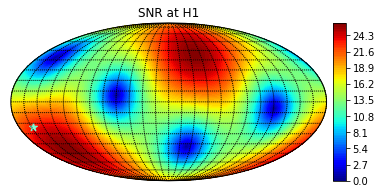

In [44]:
drawskymap(snr,'SNR','SNR',detector, 0.123, 197.4503, -23.4)
#drawskymap(antenna,'Antenna Pattern F','Antenna Pattern',detector, 0., 197.4503, -23.4)

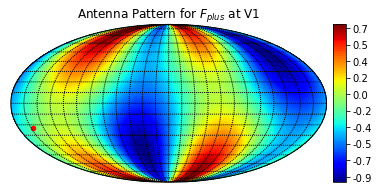

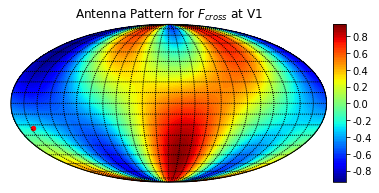

In [20]:
#antenna patterns Fplus and Fcross
detector = 'V1'

antennaplus = np.loadtxt('antennapatterns/antennapatternFplus{0}GW170817.txt'.format(detector))
antennacross = np.loadtxt('antennapatterns/antennapatternFcross{0}GW170817.txt'.format(detector))

drawskymap(antennaplus,'Antenna Pattern for $F_{plus}$', 'antennapatternfplus',detector, 0, 197.4503, -23.4)
drawskymap(antennacross,'Antenna Pattern for $F_{cross}$','antennapatternfcross',detector, 0, 197.4503, -23.4)

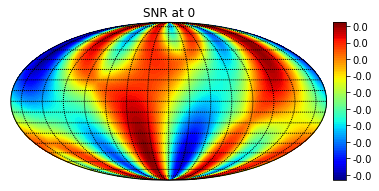

maximal dif:  1.160712842729339e-06
min dif: -3.918721215856458e-06


In [6]:
#Compare Antennapattern and SNR maps
drawskymap(norm(snr)-norm(antenna),'SNR',detector, 0, 0, 0)
print'maximal dif: ', (norm(snr)-norm(antenna)).max()
print 'min dif:', (norm(snr)-norm(antenna)).min()

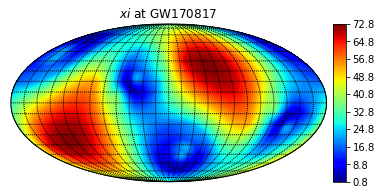

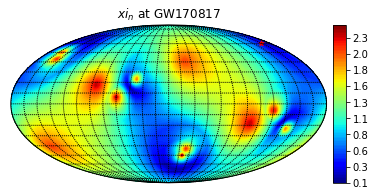

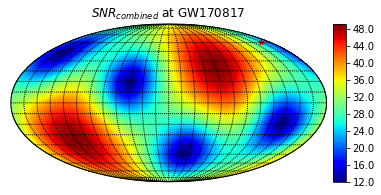

In [89]:
#find best position 
#readin
SNR_L = np.loadtxt('SNR skymap/SNR skymaps/SNR Matrix for {0} GW170817.txt'.format('L1'))
SNR_H = np.loadtxt('SNR skymap/SNR skymaps/SNR Matrix for {0} GW170817.txt'.format('H1'))
SNR_V = np.loadtxt('SNR skymap/SNR skymaps/SNR Matrix for {0} GW170817.txt'.format('V1'))

xi = abs(SNR_L-SNR_H)+abs(SNR_L-SNR_V)+abs(SNR_H-SNR_V)

xi_ = abs(SNR_L-SNR_H)/(SNR_L+SNR_H)+abs(SNR_L-SNR_V)/(SNR_L+SNR_V)+abs(SNR_H-SNR_V)/(SNR_V+SNR_H)

#combined SNR 
SNR_comb = np.sqrt(SNR_L**2+SNR_H**2+SNR_V**2)

drawskymap(xi,'$xi$', 'xi','GW170817', 0.123, 0, 0)
drawskymap(xi_,'$xi_{n}$', 'xiprime','GW170817', 0.123, 165.45, 60.91)
drawskymap(SNR_comb,'$SNR_{combined}$', 'snrcomb','GW170817', 0.123, 165.45, 60.91)

In [8]:
a = SkyCoord('121.8deg','82.7deg',unit=(u.deg, u.deg))
a.ra.hms

hms_tuple(h=8.0, m=7.0, s=12.000000000003581)

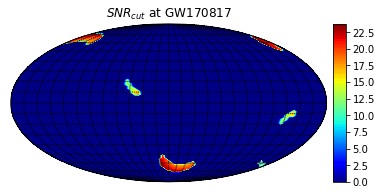

In [5]:
SNR_cut = np.loadtxt('SNR skymap/SNR skymaps/SNR_cut.txt')
drawskymap(SNR_cut,'$SNR_{cut}$', 'SNRcut','GW170817', 0, 165.45, -60.91)


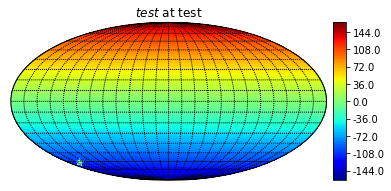

In [71]:
SNR_cut = np.loadtxt('SNR skymap/SNR skymaps/test.txt')
drawskymap(SNR_cut,'$test$', 'test','test', 0, 200, -60.91);

0.949234462423


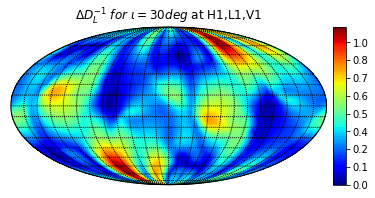

In [39]:
from numpy import *

delta_distance = np.loadtxt('relDerror5050iota31.txt')
nan = isnan(delta_distance)
delta_distance[nan] = 1000

print delta_distance.min()
delta_distance_inv = delta_distance**-1
drawskymap(delta_distance_inv,'$\Delta D_L^{-1} \ for \ \iota=30deg$', 'inv distance error','H1,L1,V1', 0, 0, 0.0);

100.0


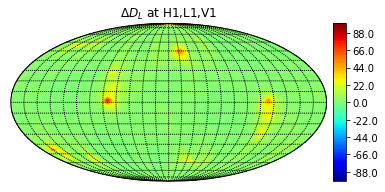

In [28]:
delta_distance = np.loadtxt('relDerror5050.txt')
nan = isnan(delta_distance) 
delta_distance[nan] = 100
nan = delta_distance >= 101
delta_distance[nan] = -100

print delta_distance.max()
delta_distance_inv = delta_distance**-1
drawskymap(delta_distance,'$\Delta D_L$', 'distance error','H1,L1,V1', 0, 0, 0.0);

9.83977974011


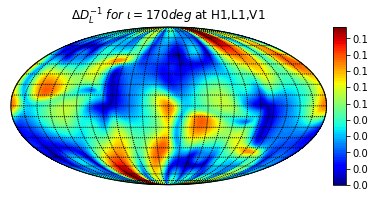

In [40]:
delta_distance = np.loadtxt('relDerror100100iota170.txt')
nan = isnan(delta_distance)
delta_distance[nan] = 1000

print delta_distance.min()
delta_distance_inv = delta_distance**-1
drawskymap(delta_distance_inv,'$\Delta D_L^{-1}\ for \ \iota=170deg$', 'inv distance error','H1,L1,V1', 0, 0, 0.0);

0.0432950854574


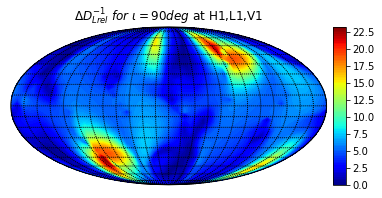

In [51]:
delta_distance = np.loadtxt('relDerror5050iota90.txt')
nan = isnan(delta_distance)
delta_distance[nan] = 1000

print delta_distance.min()
delta_distance_inv = delta_distance**-1
drawskymap(delta_distance_inv,'$\Delta D_{L rel}^{-1}\ for \ \iota=90deg$', 'inv distance error','H1,L1,V1', 0.123, 0, 0.0);

0.673161047241


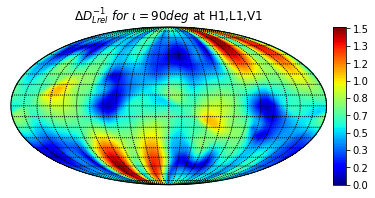

In [54]:
delta_distance = np.loadtxt('relDerror5050iota31.txt')
nan = isnan(delta_distance)
delta_distance[nan] = 1000

print delta_distance.min()
delta_distance_inv = delta_distance**-1
drawskymap(delta_distance_inv,'$\Delta D_{L rel}^{-1}\ for \ \iota=90deg$', 'inv distance error','H1,L1,V1', 0.123, 0, 0.0);

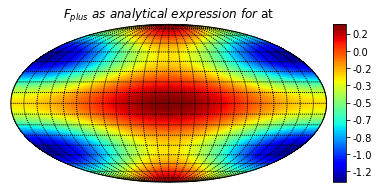

In [72]:
#Compare Fplus with analytical expression from Schutz
Fplusanalytic = np.loadtxt('Analytical expression for Fplus/Fplusanalytic.txt')
drawskymap(Fplusanalytic,'$F_{plus}\ as\ analytical\ expression\ for $', 'fplus analytical','', 0., 0, 0.0);